In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
import pathlib
import PIL
import cv2
from sklearn.model_selection import train_test_split

In [9]:
def Read_Img(np,op):
    
    normal_path = pathlib.Path(np)
    opecity_path = pathlib.Path(op)
    normal_imgdata = list(normal_path.glob("*.jpeg"))
    opecity_imgdata = list(opecity_path.glob("*.jpeg"))
    
    class_dir = {
    "normal": list(normal_path.glob("*.jpeg")),
    "opecity": list(opecity_path.glob("*.jpeg"))
    }
    label_dir = {
    "normal": 0,
    "opecity": 1
    }
    X,y = [],[]
    for result,images in class_dir.items():
        for image in images:
            img = cv2.imread(str(image))
            img_resize = cv2.resize(img,(180,180))
            X.append(img_resize)
            y.append(label_dir[result])
#     X = np.array(X)
#     y = np.array(y)
            
    return X,y

In [10]:
X,y = Read_Img("DataSets/Pnemonia/train/normal","DataSets/Pnemonia/train/opacity")

In [11]:
X = np.array(X)
y = np.array(y)
X = X/255 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

In [12]:
model = keras.Sequential([
    
        keras.layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
#         keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
#         keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation = 'relu'),
        keras.layers.Dense(2,activation = 'softmax')
    
])
model.compile(optimizer = 'adam',loss =  'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
66/66 [==============================] - 63s 922ms/step - loss: 1.0935 - accuracy: 0.7032
Epoch 2/5
66/66 [==============================] - 67s 1s/step - loss: 0.4563 - accuracy: 0.7495
Epoch 3/5
66/66 [==============================] - 68s 1s/step - loss: 0.2839 - accuracy: 0.7495
Epoch 4/5
66/66 [==============================] - 68s 1s/step - loss: 0.2468 - accuracy: 0.8053
Epoch 5/5
66/66 [==============================] - 69s 1s/step - loss: 0.2174 - accuracy: 0.9656


In [14]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 15s 219ms/step - loss: 0.2280 - accuracy: 0.9590


[0.22800102829933167, 0.9589694738388062]

#### Let's Try on Validation Dataset

In [15]:
Xv,yv = Read_Img("DataSets/Pnemonia/val/normal","DataSets/Pnemonia/val/opacity")

In [16]:
Xv = np.array(Xv)
yv = np.array(yv)
Xv = Xv/255

In [17]:
yp = model.predict(Xv)
my_prediction = []
for i in range(len(yp)):
    my_prediction.append(np.argmax(yp[i]))

<AxesSubplot:>

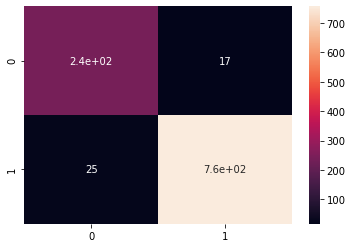

In [18]:
cm = confusion_matrix(my_prediction,yv)
sn.heatmap(cm,annot=True)

In [19]:
print(classification_report(my_prediction,yv))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       259
           1       0.98      0.97      0.97       781

    accuracy                           0.96      1040
   macro avg       0.94      0.95      0.95      1040
weighted avg       0.96      0.96      0.96      1040

